<a href="https://colab.research.google.com/github/judysian/Salary-Prediction-Model/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
df=pd.read_csv("/content/drive/MyDrive/HR_comma_sep 1.csv")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


QUESTION 1:Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)



In [19]:
#finding the average of employees who left means grouping the numeric columns and dropping the non numeric columns
numbers_df = df.drop(columns=['Department', 'salary'])
left = numbers_df.groupby('left').mean()
print(left)

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


QUESTION2)Plot bar charts showing impact of employee salaries on retention



In [23]:
#how salary impacts if the employees left or stayed
employee_salary = pd.crosstab(df.salary, df.left)


In [22]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


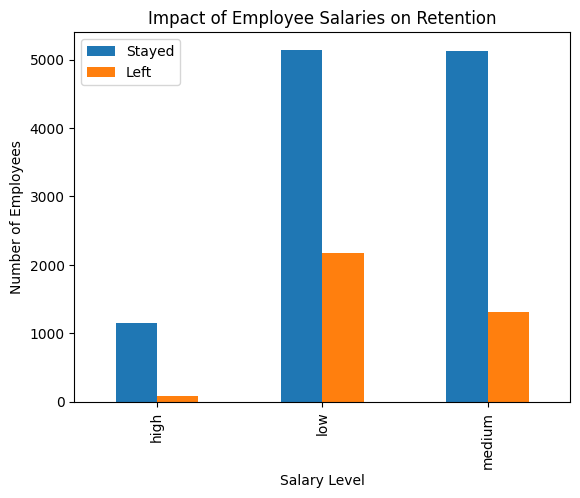

In [25]:
employee_salary.plot(kind='bar')
plt.title('Impact of Employee Salaries on Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(['Stayed', 'Left'])
plt.show()

QUESTION 3)Plot bar charts showing corelation between department and employee retention



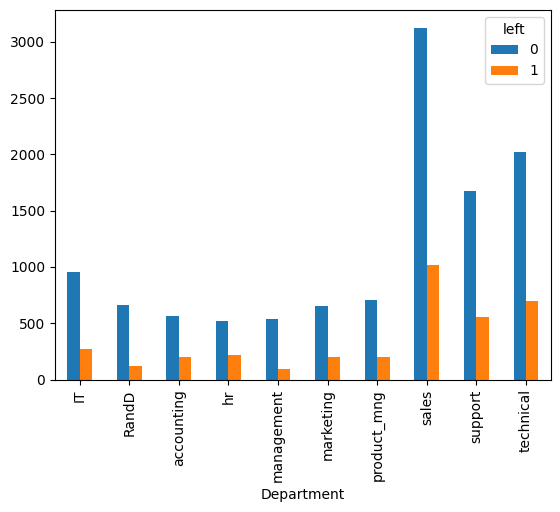

In [29]:

pd.crosstab(df.Department, df.left).plot(kind='bar')

plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.legend(['Stayed', 'Left'])

plt.show()

QUESTION 4)Now build logistic regression model using variables that were narrowed down in step 1



In [ ]:
#Satisfaction Level
#Average Monthly Hours
#Promotion in Last 5 Years
#Salary

In [33]:
required_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]

In [34]:
new_salary = pd.get_dummies(required_df.salary, prefix="salary")

In [35]:
X = pd.concat([required_df.drop('salary', axis='columns'), new_salary], axis='columns')
y = df.left

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

QUESTION 5)Measure the accuracy of the model

In [40]:
model.score(X_test, y_test)

0.7675555555555555